In [1]:
from utils import *

# Load dataset

In [9]:
# Load data
dataset_path = "data/postgis_output/"
dataset = load_and_preprocess_multiple_csv_from_path(dataset_path,\
                                                    preprocess_function=preprocess_complete_dataset,\
                                                     only_first_n=10, dtype={'edifc_uso': object})

In [10]:
# Show the dataset
print("Dataset Shape: ", dataset.shape)
dataset.iloc[:5, :]

Dataset Shape:  (2095, 14)


,footprint_id,edifc_uso,max_in_footprint,percentile_20_in_footprint,percentile_40_in_footprint,percentile_60_in_footprint,percentile_80_in_footprint,min_overrall,building_height,roof_height,footprint_area,points,footprint_geometry,edifc_uso_desc
0,278.0,01,201.19,191.420,191.510,193.012,193.840,159.41,41.78,9.680,475.711112,"[[9.20952623, 45.47557462, 161.65], [9.2094114...",MULTIPOLYGON (((9.209704369865173 45.475862279...,residenziale
1,301.0,01,188.26,181.010,181.674,182.480,183.310,161.53,26.73,6.586,518.079180,"[[9.20696574, 45.47445747, 161.59], [9.2070175...",MULTIPOLYGON (((9.206961690749557 45.474526198...,residenziale
3,502.0,01,181.00,172.486,173.032,173.608,174.178,161.35,19.65,7.968,126.103360,"[[9.20718624, 45.47241497, 180.31], [9.2071468...",MULTIPOLYGON (((9.20725856675191 45.4725026142...,residenziale
5,569.0,01,188.55,175.230,176.520,178.120,179.800,157.82,30.73,12.030,1125.681070,"[[9.20884215, 45.47111237, 160.13], [9.2088324...",MULTIPOLYGON (((9.208811797507325 45.471435538...,residenziale
8,610.0,01,192.23,184.240,185.000,185.050,185.130,157.83,34.40,7.230,946.916044,"[[9.20408204, 45.47035866, 168.84], [9.2046206...",MULTIPOLYGON (((9.204768919594198 45.470535503...,residenziale


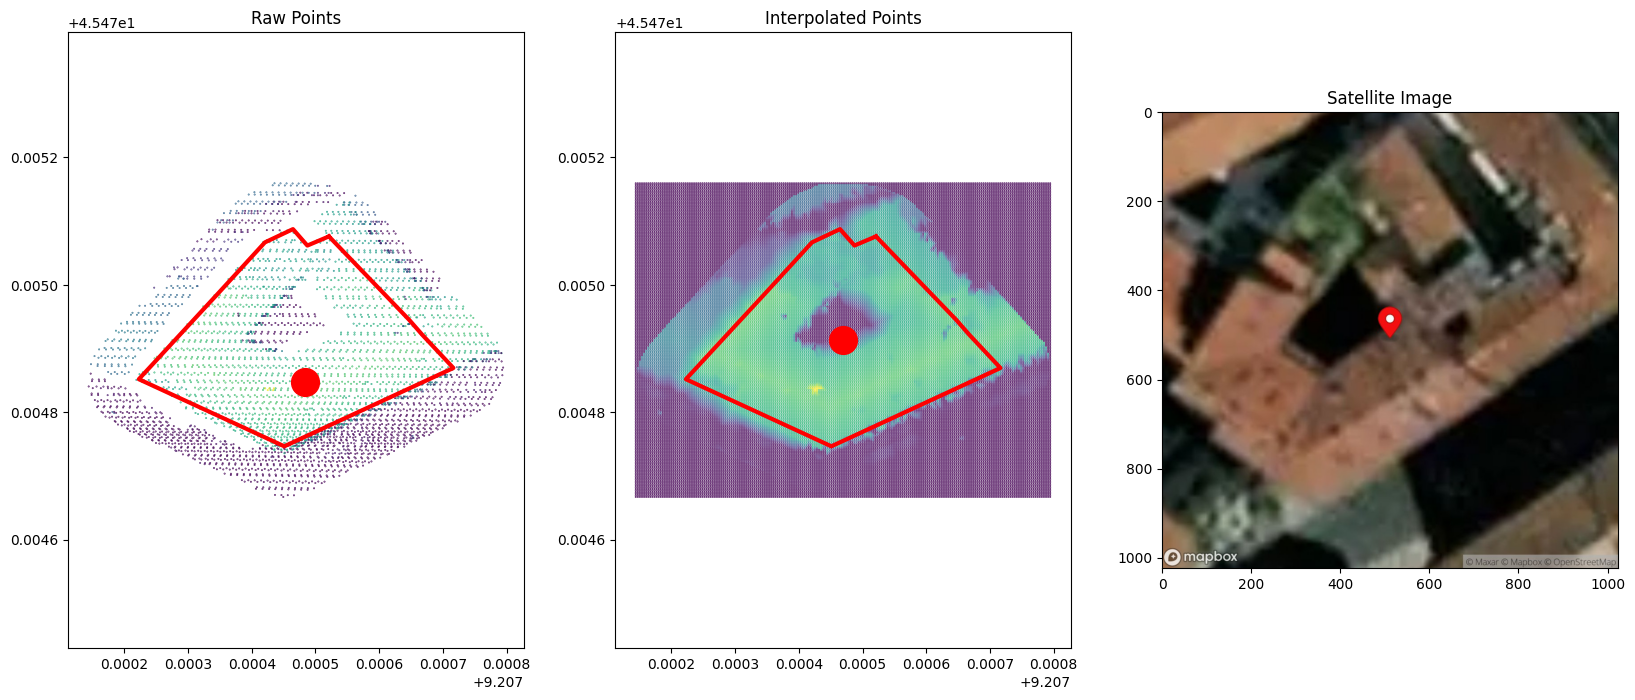

In [14]:
# Show data example
show_data_example(dataset, example_n=5)

# Rebalance Dataset

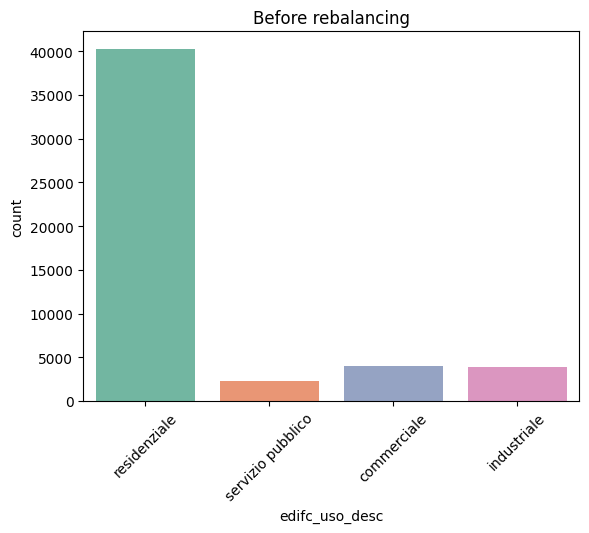

In [6]:
# Check if dataset is balanced
show_dataset_balance(dataset, "edifc_uso_desc", title="Before rebalancing")

In [7]:
balanced_dataset = balance_dataset(dataset, "edifc_uso_desc")

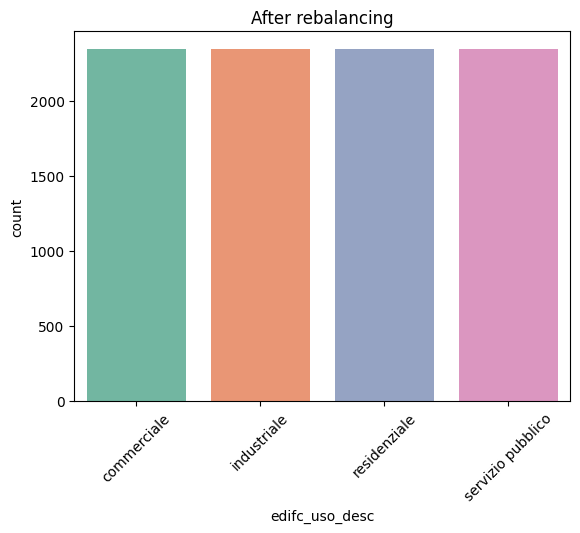

In [8]:
show_dataset_balance(balanced_dataset, "edifc_uso_desc", title="After rebalancing")

# Features approach

In order to keep the codebase as clean as possible, the Features approach is coded in the features_approach.ipynb file.

# CNN approach

In order to keep the codebase as clean as possible, the CNN approach is coded in the cnn_approach.ipynb file.